# 2021 Advent of Code

I decided to combine all code for this year in one Jupyter notebook. To keep things clean custom functions are imported from a separate file. I also want to improve my skills in object oriented programming, so this will be the focus for this year.

In [91]:
%load_ext autoreload
%autoreload
from tools.data import ReadAndSplit, ReadData
from tools.challenges import ReadDiagnostics, Bingo, Lines, LantarnFishList, LantarnFish
import numpy as np
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Day 1
See if depth increases from one data point to the next.

In [2]:
# Part 1
sea_depth = ReadAndSplit("input_data/day_1_p1.txt")
sea_depth.split_break(data_type="int")

checker = sea_depth[0]
counter = 0
for i in sea_depth:
    if i > checker:
        counter += 1

    checker = i

counter

FileNotFoundError: [Errno 2] No such file or directory: 'input_data/day_1_p1.txt'

In [ ]:
# Part 2
checker = sea_depth[0] + sea_depth[1] + sea_depth[2]
counter = 0
for i, depth in enumerate(sea_depth):
    try:
        sliding_window = sea_depth[i] + sea_depth[(i+1)] + sea_depth[(i+2)]
    except:
        break
    if sliding_window > checker:
        counter += 1

    checker = sliding_window

counter

1704

## Day 2

Find the final position of the submarine, than multiply it.

In [94]:
# Part 1
sub_directions = ReadAndSplit("data/2_t.txt")
sub_directions.split_break()

horizontal_position = 0
depth_position = 0

for input in sub_directions:
    direction, amount = input.split(" ")
    amount = int(amount)
    if direction == "forward":
        horizontal_position += amount
    elif direction == "down":
        depth_position += amount
    elif direction == "up":
        depth_position -= amount

horizontal_position * depth_position

150

In [95]:
# Part 2
horizontal_position = 0
depth_position = 0
aim = 0

for input in sub_directions:
    direction, amount = input.split(" ")
    amount = int(amount)
    if direction == "forward":
        horizontal_position += amount
    elif direction == "up":
        aim -= amount

horizontal_position * depth_position

0

# Day 3 find the most and least common bit
Than multipply the total value together

In [ ]:
# Part 1
diag_report_read = ReadAndSplit("input_data/day_3_p1.txt")
diag_report_read.split_break()

diag_report = ReadDiagnostics(diag_report_read)
diag_report.get_power_consumption()


3148794

In [ ]:
# Part 2
diag_report.get_life_support_rating()

2795310

## Day 4

Play bingo with a squid

In [ ]:
bingo_input = ReadAndSplit("input_data/day_4_p1.txt")
bingo_input.split_double_break()
bingo_input.split_break()

bingo_numbers = bingo_input[0][0]
bingo_numbers = bingo_numbers.split(",")
temp = []
for i in bingo_numbers:
    temp.append(int(i))
bingo_numbers = temp

bingo_cards = []
for card in bingo_input[1:]:
    single_card = []
    for line in card:
        split_line = line.split(" ")
        temp = []
        for entry in split_line:
            if entry != "":
                temp.append(int(entry))
        single_card.append(temp)
    bingo_cards.append(single_card)

bingo = Bingo(bingo_numbers, bingo_cards)
bingo.last_winning_board()


(31, [44], 4495)

In [ ]:
test_string = "test test  testtest   test"
print(test_string.split())

['test', 'test', 'testtest', 'test']


## Day 5
Find overlapping lines

In [ ]:
line_coord = ReadAndSplit("input_data/day_5_p1.txt")
line_coord.split_break()
line_coord.split_on(" -> ")
line_coord.split_on(",", data_type="int")

line_map = Lines(line_coord)
line_map.find_danger_zone(no_diagonal=False)
# line_map

16716

## Day 6
Simulate lantarn fish

5.525232464872438*1.0910958312492127**x


5907

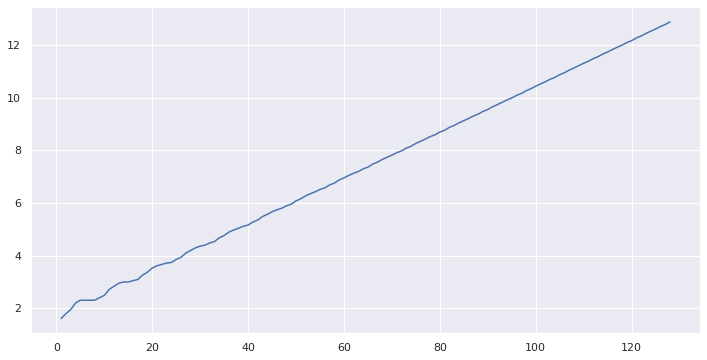

In [ ]:
# lantern_start_pop = ReadAndSplit("input_data/day_6_p1_t.txt")
# lantern_start_pop.split_on(",", data_type="int")

# lantarn_sim = LantarnFishList(lantern_start_pop)
# X, y = lantarn_sim.simulate_fish(128, save_results=True)

# sns.set(rc={"figure.figsize":(12, 6)})
# sns.lineplot(x=X, y=np.log(y))

# fit = np.polyfit(X, np.log(y), 1)

# def much_fish(fit, x):
#     first_term = np.e ** fit[1]
#     second_term = np.e ** fit[0]
#     print(f"{first_term}*{second_term}**x")
#     return int(first_term * (second_term**x))
    
# much_fish(fit, 80)

In [ ]:
lantern_start_pop = ReadAndSplit("input_data/day_6_p1.txt")
lantern_start_pop.split_on(",", data_type="int")

lantarn_sim = LantarnFish(lantern_start_pop)
lantarn_sim.simulate_fish(256)

1767323539209

## Day 7


<AxesSubplot:>

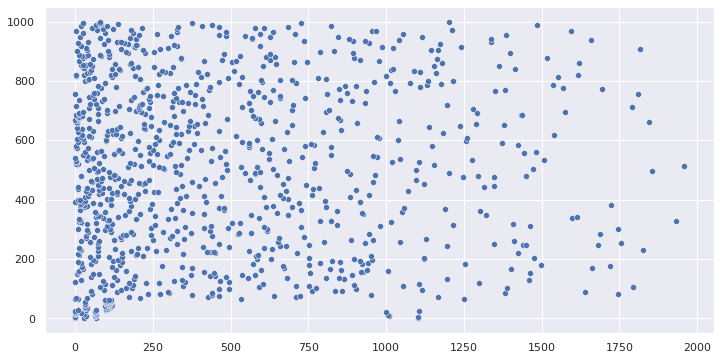

In [15]:
data = ReadData("data/7.txt", lines=False, read_int=False)
data.special_split(",")
horizontal_position = [int(i) for i in data]
y = [i for i in range(len(horizontal_position))]

sns.set(rc={"figure.figsize":(12, 6)})
sns.scatterplot(x=horizontal_position, y=y)

In [87]:
test = ['acedgfb', 'cdfbe', 'gcdfa', 'fbcad', 'dab', 'cefabd', 'cdfgeb', 'eafb', 'cagedb', 'ab']
test.sort(key=len)
# print(test)

class DigitTracker(object):
    def __init__(self) -> None:
        self.digit = [{'a', 'b', 'c', 'd', 'e', 'f', 'g'},
                      {'a', 'b', 'c', 'd', 'e', 'f', 'g'},
                      {'a', 'b', 'c', 'd', 'e', 'f', 'g'},
                      {'a', 'b', 'c', 'd', 'e', 'f', 'g'},
                      {'a', 'b', 'c', 'd', 'e', 'f', 'g'},
                      {'a', 'b', 'c', 'd', 'e', 'f', 'g'},
                      {'a', 'b', 'c', 'd', 'e', 'f', 'g'}]
        self.len_5 = []
        self.len_6 = []
        super().__init__()

    def update_tracker(self, input):
        str_set = {i for i in input}
        input_len = len(input)
        if input_len == 2:
            self.digit[3] = self.digit[3].intersection(str_set)
            self.digit[6] = self.digit[6].intersection(str_set)
            # Remove found from other sets
            self.digit[1] = self.digit[1].difference(self.digit[3])
            self.digit[2] = self.digit[2].difference(self.digit[3])
            self.digit[4] = self.digit[4].difference(self.digit[3])
            self.digit[5] = self.digit[5].difference(self.digit[3])
        elif input_len == 3:
            self.digit[0] = str_set.difference(self.digit[3])
            # Remove found from other sets
            self.digit[1] = self.digit[1].difference(self.digit[0])
            self.digit[2] = self.digit[2].difference(self.digit[0])
            self.digit[4] = self.digit[4].difference(self.digit[0])
            self.digit[5] = self.digit[5].difference(self.digit[0])
        elif input_len == 4:
            self.digit[1] = str_set.difference(self.digit[3])
            self.digit[2] = str_set.difference(self.digit[3])
            # Remove found from other sets
            self.digit[4] = self.digit[4].difference(self.digit[1])
            self.digit[5] = self.digit[5].difference(self.digit[1])
        elif input_len == 5:
            if len(self.len_5) < 2:
                self.len_5.append(str_set)
            else:
                self.len_5.append(str_set)
                intersect = self.len_5[0].intersection(self.len_5[1])
                intersect = intersect.intersection(self.len_5[2])
                intersect = {'a', 'b', 'c', 'd', 'e', 'f', 'g'}.difference(intersect)
                print(intersect)
                self.digit[1] = self.digit[1].intersection(intersect)
                self.digit[4] = self.digit[4].intersection(intersect)
                # Remove found from other sets
                self.digit[2] = self.digit[2].difference(self.digit[1])
                self.digit[5] = self.digit[5].difference(self.digit[1])
                self.digit[5] = self.digit[5].difference(self.digit[4])


        elif input_len == 6:
            if len(self.len_6) < 2:
                self.len_6.append(str_set)
            else:
                self.len_6.append(str_set)
                intersect = self.len_6[0].intersection(self.len_6[1])
                intersect = intersect.intersection(self.len_6[2])
                intersect = {'a', 'b', 'c', 'd', 'e', 'f', 'g'}.difference(intersect)
                print(intersect)
                self.digit[3] = self.digit[3].intersection(intersect)
                # Remove found from others
                self.digit[6] = self.digit[6].difference(self.digit[3])
            
        return self.digit

    def get_digit(self):
        return self.digit

digit = DigitTracker()

for i in test:
    digit.update_tracker(i)

digit.get_digit()

{'e', 'b', 'g', 'a'}
{'f', 'g', 'a'}


[{'d'}, {'e'}, {'f'}, {'a'}, {'g'}, {'c'}, {'b'}]

In [81]:
number = ""

number += str(4)
number += str(2)

number = int(number)

print(number)

42


In [4]:
class JumpCounter(object):
    def __init__(self) -> None:
        self.counter = 0
        super().__init__()

    def jump(self, dist_left):
        if dist_left >= 1:
            self.counter += 1
            self.jump(dist_left - 1)
        if dist_left >= 2:
            self.counter += 1
            self.jump(dist_left - 2)

    def get_counter(self):
        return self.counter

frog = JumpCounter()
frog.jump(12)
frog.get_counter()

608

In [3]:
def frog_jump(n):
    if n < 0:
        raise ValueError("Invalid index")
    if n == 0:
        return 0
    if n == 1:
        return 1
    return frog_jump(n - 1) + frog_jump(n - 2)

frog_jump(12)

144